# Lab 02, Experiment No 2


# General PAM Transmitter: 

# Part (a)

In [7]:
%matplotlib inline
%run ascfun    # Running ascfun which was developed in Lab 1 to convert the text to bit sequence

In [8]:
# %load pamfun.py
# File: pamfun.py
# Functions for pulse amplitude modulation (PAM)
from pylab import *
def pam10(an, FB, Fs, ptype, pparms=[]):
	"""
	Pulse amplitude modulation: a_n -> s(t), -TB/2<=t<(N-1/2)*TB,
	V1.0 for ’rect’, ’sinc’, and ’tri’ pulse types.
	>>>>> tt, st = pam10(an, FB, Fs, ptype, pparms) <<<<<
	where an:
	N-symbol DT input sequence a_n, 0 <= n < N
	FB:
	Baud rate of a_n, TB=1/FB
	Fs:
	sampling rate of s(t)
	ptype: pulse type (’rect’,’sinc’,’tri’)
	pparms not used for ’rect’,’tri’
	pparms = [k, beta] for ’sinc’
	k:
	"tail" truncation parameter for ’sinc’
	(truncates p(t) to -k*TB <= t < k*TB)
	beta: Kaiser window parameter for ’sinc’
	tt:
	time axis for s(t), starts at -TB/2
	st:
	CT output signal s(t), -TB/2<=t<(N-1/2)*TB,
	with sampling rate Fs
	"""
	N = len(an)			# Number of data symbols
	TB = 1/float(FB)		# Time per symbol
	ixL = ceil(-Fs*0.5*TB)		# Left index for time axis
	ixR = ceil(Fs*(N-0.5)*TB) 	# Right index for time axis
	tt = arange(ixL,ixR)/float(Fs) 	# Time axis for s(t)
	
	# ***** Conversion from DT a_n to CT a_s(t) *****
	ast = zeros(len(tt))		# Initialize a_s(t)
	ix = array(around(Fs*arange(0,N)*TB),int)	# Symbol center indexes
	ast[ix-int(ixL)] = Fs*an	# delta_n -> delta(t) conversion
	
	# ***** Set up PAM pulse p(t) *****
	ptype = ptype.lower()	# Convert ptype to lowercase
	
	# Set left/right limits for p(t)
	if (ptype=='rect'):
		kL = -0.5; kR = -kL
	else:
		kL = -1.0; kR = -kL
	
	# Default left/right limits
	ixpL = ceil(Fs*kL*TB)		# Left index for p(t) time axis
	ixpR = ceil(Fs*kR*TB)		# Right index for p(t) time axis
	ttp = arange(ixpL,ixpR)/float(Fs)	 # Time axis for p(t)
	pt = zeros(len(ttp))		# Initialize pulse p(t)
	if (ptype=='rect'):		# Rectangular p(t)
		ix = where(logical_and(ttp>=kL*TB, ttp<kR*TB))[0]
		pt[ix] = ones(len(ix))
	elif (ptype == 'tri'):
		pt = array([(1+i*1/TB) if i*1/TB+1 < 1.0 else (1-i*1/TB) for i in list(ttp)])
	elif (ptype=='sinc'):
		k=pparms[0]
		kL = -1.0*k
		kR = -kL
		ixpL = ceil(Fs*kL*TB)		# Left index for p(t) time axis
		ixpR = ceil(Fs*kR*TB)		# Right index for p(t) time axis
		ttp = arange(ixpL,ixpR)/float(Fs)	 # Time axis for p(t)
		pt = zeros(len(ttp))
		beta=pparms[1]
		pt = array([sin(pi*t/TB)/(pi*t/TB) if t!= 0  else  1.0 for t in list(ttp)])
		pt=pt*kaiser(len(pt), beta)
	else:
		print("ptype ’%s’ is not recognized" % ptype)
	
	# ***** Filter with h(t) = p(t) *****
	st = convolve(ast,pt)/float(Fs) 	# s(t) = a_s(t)*p(t)
	st = st[-ixpL:ixR-ixL-ixpL] 		# Trim after convolution
	return tt, st


In [9]:
#%run pamfun.py

In [10]:
dn = asc2bin('Test')    # to get the unipolar binary sequence bits for word "Test"

In [11]:
dn_prime = 2*dn - 1     # Converting it into bipolar binary sequence i.e 1s and -1s

In [12]:
an = hstack((array([0,0]), dn_prime, array([0,0])))   # padding two zeros at starting and end

In [13]:
FB = 100          # Given value

In [14]:
Fs = 44100

# Plotting Rectanglar Wave 

In [15]:
ptype = 'rect'    # defining the pulse type to draw

In [16]:
tt,st=pam10(an,FB,Fs,ptype)          # running the function pam 10 and taking the output in tt and st

/home/vishal-srivastav/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:75: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


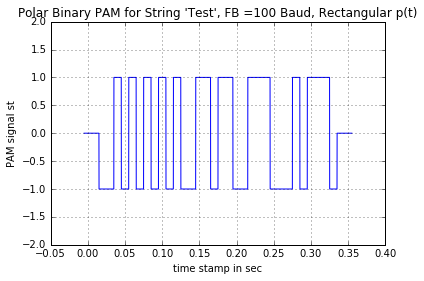

In [17]:
plot(tt,st)
ylim([-2,2])
title('Polar Binary PAM for String \'Test\', FB =%s Baud, Rectangular p(t)' %FB)
grid()
xlabel('time stamp in sec')
ylabel('PAM signal st')

# Plotting PAM with Triangular Pulse

In [18]:
ptype = 'tri'

In [19]:
tt,st=pam10(an,FB,Fs,ptype)          # running the function pam 10 and taking the output in tt and st

/home/vishal-srivastav/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:75: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


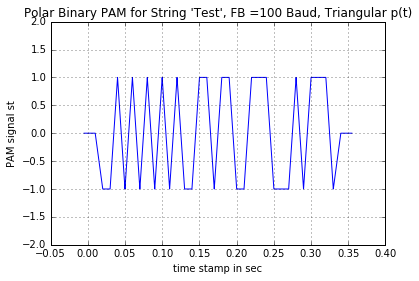

In [20]:
plot(tt,st)
ylim([-2,2])
title('Polar Binary PAM for String \'Test\', FB =%s Baud, Triangular p(t)' %FB)
grid()
xlabel('time stamp in sec')
ylabel('PAM signal st')

# Plotting PAM with Sinc Pulse

In [21]:
ptype='sinc'
pparms = [10,4]

In [22]:
tt,st=pam10(an,FB,Fs,ptype,pparms)          # running the function pam 10 and taking the output in tt and st

/home/vishal-srivastav/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:75: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


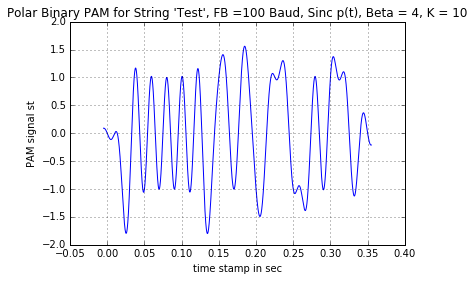

In [23]:
plot(tt,st)
ylim([-2,2])
title('Polar Binary PAM for String \'Test\', FB =%s Baud, Sinc p(t), Beta = %s, K = %s' %(FB,pparms[1],pparms[0]))
grid()
xlabel('time stamp in sec')
ylabel('PAM signal st')

# Part (b)

In [24]:
dn = random(FB/2)        # Random sequence, uniform in [0...1]
dn = array(floor(2*dn),int)            # Random unipolar binary sequence in {0,1}
an = 2*dn-1            # Random polar binary sequence in {-1,+1}

/home/vishal-srivastav/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


# Rectangular Pulse PAM for randomly generated sequence

In [25]:
ptype = 'rect'
FB = 100
Fs = 44100

In [26]:
tt,st=pam10(an,FB,Fs,ptype,pparms)          # running the function pam 10 and taking the output in tt and st

/home/vishal-srivastav/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:75: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


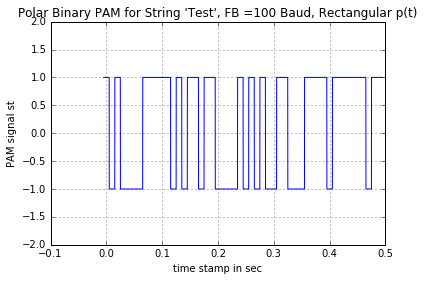

In [27]:
plot(tt,st)
ylim([-2,2])
title('Polar Binary PAM for String \'Test\', FB =%s Baud, Rectangular p(t)' %FB)
grid()
xlabel('time stamp in sec')
ylabel('PAM signal st')

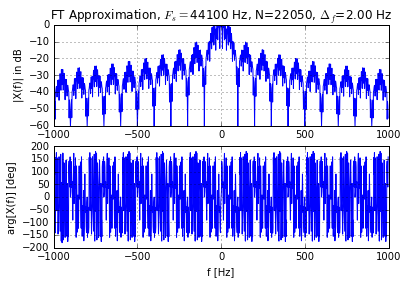

In [28]:
%run showfun.py
showft(tt,st,[-1000,1000,-60])

# Triangular Pulse PAM for randomly generated sequence

In [29]:
ptype = 'tri'
FB = 100
Fs = 44100

In [30]:
tt,st=pam10(an,FB,Fs,ptype,pparms)          # running the function pam 10 and taking the output in tt and st

/home/vishal-srivastav/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:75: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


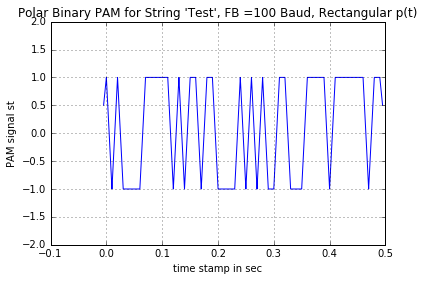

In [31]:
plot(tt,st)
ylim([-2,2])
title('Polar Binary PAM for String \'Test\', FB =%s Baud, Rectangular p(t)' %FB)
grid()
xlabel('time stamp in sec')
ylabel('PAM signal st')

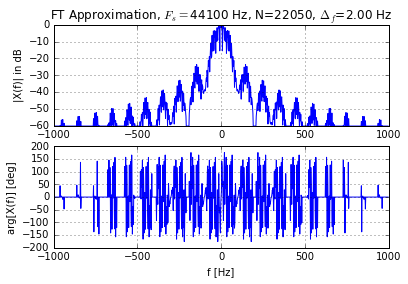

In [32]:
%run showfun.py
showft(tt,st,[-1000,1000,-60])

# Sinc Pulse PAM for randomly generated sequence

In [33]:
ptype = 'sinc'
FB = 100
Fs = 44100
pparms=[10,2]

In [34]:
tt,st=pam10(an,FB,Fs,ptype,pparms)          # running the function pam 10 and taking the output in tt and st

/home/vishal-srivastav/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:75: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


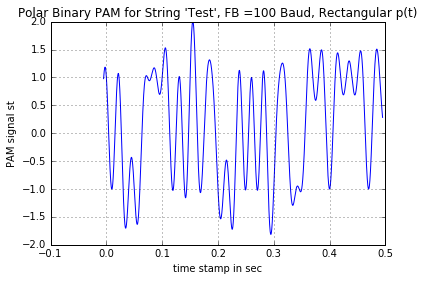

In [35]:
plot(tt,st)
ylim([-2,2])
title('Polar Binary PAM for String \'Test\', FB =%s Baud, Rectangular p(t)' %FB)
grid()
xlabel('time stamp in sec')
ylabel('PAM signal st')

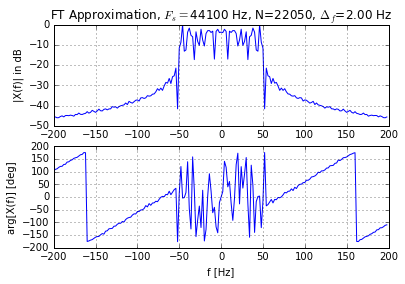

In [36]:
%run showfun.py
showft(tt,st,[-200,200,-60])

#  Comparison:  The spectrum of triangular pulse is sinc square and rectangular pulse is sinc, so the spectrum of sequence created with these pulses look very same with little difference. The spectrum of PAM signal with sinc pulse should look like rectangular pulse, and it looks very close to that. 